# Importing Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [36]:
df = sns.load_dataset("iris")

In [37]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Separating Independent and Dependent Features

In [38]:
x = df.drop(columns=["species"])
y = df[["species"]]

In [39]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [40]:
y

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


# Train Test Split

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [57]:
print(x_train.shape)
print(x_test.shape)

(100, 4)
(50, 4)


# Decision Tree Classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [59]:
# Pre-Pruning   (It is done WHILE creating the Decision-Tree)

parameters = {
    'criterion' : ["gini", "entropy", "log_loss"],
    'max_depth' : [1,2,3,4,5],
    'splitter' : ["best", "random"],
    'max_features' : ["auto", "sqrt", "log2"]
}

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
dt_model = DecisionTreeClassifier(max_depth=2)

dt_model.fit(x_train, y_train)

gscv = GridSearchCV(dt_model, param_grid=parameters, cv=5, scoring="accuracy")

In [62]:
gscv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [63]:
gscv.best_params_    # for seeing which best parameters it has choosen

{'criterion': 'log_loss',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'random'}

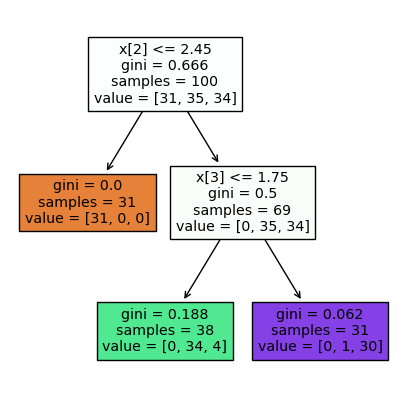

In [64]:
plt.figure(figsize=[5,5])
tree = plot_tree(dt_model, filled=True)

In [65]:
ypred = gscv.predict(x_test)

ypred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'setosa', 'versicolor',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'virginica'], dtype=object)

# Model Evaluation

In [66]:
from sklearn.metrics import accuracy_score, classification_report

In [67]:
acc = accuracy_score(ypred, y_test)
print("Accuracy Score:",acc)

Accuracy Score: 0.94


In [68]:
clf_report = classification_report(ypred, y_test)
print(clf_report)

              precision    recall  f1-score   support

      setosa       1.00      0.95      0.97        20
  versicolor       0.87      0.93      0.90        14
   virginica       0.94      0.94      0.94        16

    accuracy                           0.94        50
   macro avg       0.93      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50

